# Stage 2 Data analysis and Modelling 

---

---
## Contents
1. Relationship Analysis among attributes
2. Correlation Matrix
2. Modelling

In [41]:
import requests
import json
import pandas as pd
import re
import math
import warnings
warnings.filterwarnings('ignore')
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', 50) # show all columns
pd.set_option('display.max_rows', 500) # show all rows
from matplotlib.colors import LogNorm
    

#### load the combined dataset

## Marker format!!

In [42]:
df = pd.read_csv('../data/final_data2.csv')

### Relationship Analysis among attributes

In [43]:
# Based on 44 countries
countries = df['LOCATION'].unique() 
len(countries)

44

In [44]:
df.head()

,LOCATION,TIME,Value_disposable_income,Value_adult_education,Value_alcohol_consumption,Value_air_pollution,Value_overweight_population,Value_avg_annual_hours,Happiness Rank,HDI Rank (2017),income_inequality,unemployment,HDI_value,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Australia,2015,37740.175079,42.888756,9.70,27.35672,64.033333,1683.55,10.0,NaN,8.0,6.1,0.936,Australia and New Zealand,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460
1,Australia,2016,38658.848064,43.743900,9.40,26.00392,64.500000,1673.40,9.0,NaN,8.3,5.7,0.938,Australia and New Zealand,7.313,1.444430,1.104760,0.851200,0.568370,0.323310,0.474070,2.546500
2,Australia,2017,39928.817097,45.355675,9.55,25.97999,NaN,1674.90,10.0,3.0,8.0,5.7,0.939,Australia and New Zealand,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,2.065211
3,Austria,2015,34429.798275,30.550726,11.60,93.02611,53.900000,1500.00,13.0,NaN,8.5,5.7,0.903,Western Europe,7.200,1.337230,1.297040,0.890420,0.624330,0.186760,0.330880,2.533200
4,Austria,2016,35653.315625,31.383963,11.80,87.03744,54.300000,1512.00,12.0,NaN,7.4,6.0,0.906,Western Europe,7.119,1.450380,1.083830,0.805650,0.543550,0.213480,0.328650,2.693430


In [45]:
df['TIME'].unique()

array([2015, 2016, 2017])

### Q1: Do Happiness score is related to the happiness rank? 
**Two way relationship**

We feel there are positive relationship between score and rank. i,e, higher score, lower(better) rank

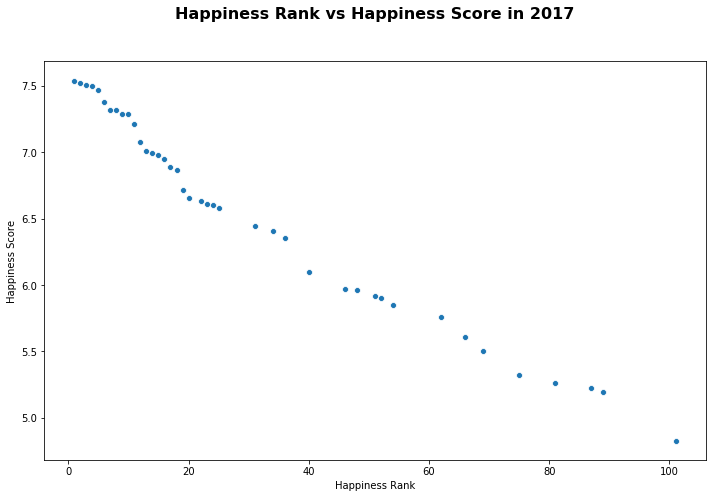

In [46]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Happiness Rank","Happiness Score", data=df[df['TIME']==2017])
ax.text(x=0.5, y=1.1, s='Happiness Rank vs Happiness Score in 2017', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 8)
#plt.xlim(0, 1.8)

fig.tight_layout()
plt.show()

Based on plot above, yes! higher score, lower(better) rank
#### Thus, in the following analysis, we use happiness score as the interested feature we want to focus on analysis and predict

### Q2: Is there positive relationship between GDP and Hapinesss score?
**Four way relatipnship**
Intuitively, we feel higher GDP, higher Hapiness score

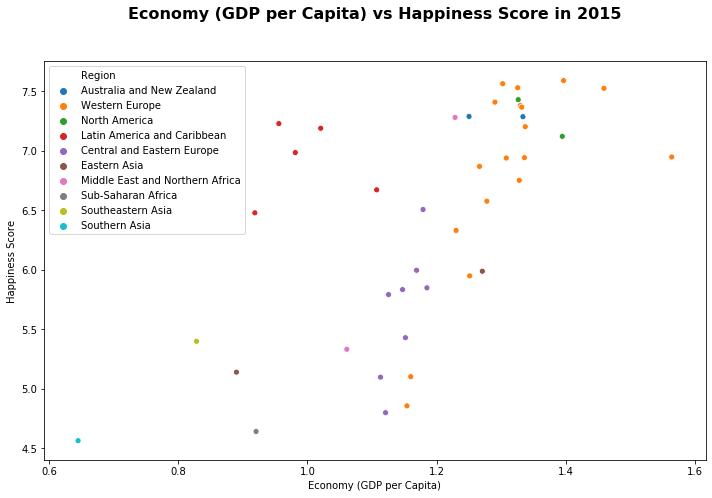

In [53]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Economy (GDP per Capita)","Happiness Score",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Economy (GDP per Capita) vs Happiness Score in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 8)
#plt.xlim(0, 1.8)

fig.tight_layout()
plt.show()

- The cuntry with higher GDP generally has higher Happiness score
- However, the countries in `Latin America and Caribbeam` region have high happiness score but relatevely low GDP

### Q3: Is there positive relationship between Air pollution and Hapinesss score?
**Four way relatipnship**

Intuitively, we feel lower air pollution, higher Hapiness score

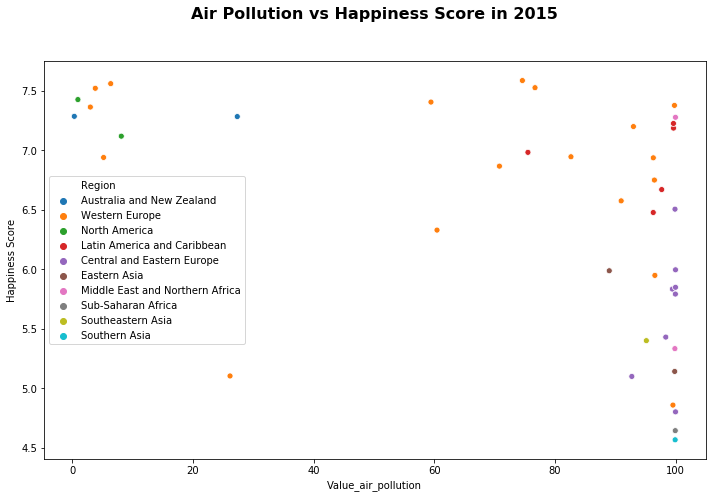

In [48]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Value_air_pollution","Happiness Score",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Air Pollution vs Happiness Score in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 10)
#plt.xlim(0, 110)

fig.tight_layout()
plt.show()


- the countries with lower air pollution are more likely to have higher happiness score
- most country have quite high air pollutions
- The country generally either quite low air pollution or quite high air pollution

### Q4: Is there any country change Happiness score a lot from 2015 to 2017, which can be caused by GDP or Air pollution?
**Five way relatipnship** (Build table)

If the country's score changed more than 0.5 from 2015 to 2017, Is it possible be caused by GDP or air pollution?

In [52]:
for country in df['LOCATION'].unique():
    sub_data = df[df['LOCATION'] == country]  # select data from that year
    score_2015 = 0
    score_2017=0
    GDP_2015 = 0
    GDP_2017 = 0
    air_pollution_2015=0
    air_pollution_2017=0
    for index, row in sub_data.iterrows():
        if row['TIME']==2015:
            score_2015 = row['Happiness Score']
            GDP_2015 = row['Economy (GDP per Capita)']
            air_pollution_2015 =row['Value_air_pollution']
        if row['TIME']==2017:
            score_2017 = row['Happiness Score']
            GDP_2017  = row['Economy (GDP per Capita)']
            air_pollution_2017 = row['Value_air_pollution']
        
    if abs(float(score_2015)- float(score_2017)) >0.5 and float(score_2017)!=0 and float(score_2015)!=0:   # If the country's score changed more than 0.5 from 2015 to 2017
        print(country)
        print()
        print("Happiness Score in 2015 is{}".format(score_2015))
        print("Happiness Score in 2017 is{}".format(score_2017))
        print()
        print("GDP in 2015 is{}".format(GDP_2015))
        print("GDP in 2017 is{}".format(GDP_2017))
        print()
        print("Air pollution in 2015 is{}".format(air_pollution_2015))
        print("Air pollution in 2017 is{}".format(air_pollution_2017))
        
    
        print("--------------------")

Hungary

Happiness Score in 2015 is4.8
Happiness Score in 2017 is5.32399988174438

GDP in 2015 is1.12094
GDP in 2017 is1.2860119342803995

Air pollution in 2015 is100.0
Air pollution in 2017 is100.0
--------------------
Latvia

Happiness Score in 2015 is5.098
Happiness Score in 2017 is5.849999904632571

GDP in 2015 is1.11312
GDP in 2017 is1.26074862480164

Air pollution in 2015 is92.75871
Air pollution in 2017 is89.26035999999998
--------------------
Mexico

Happiness Score in 2015 is7.187
Happiness Score in 2017 is6.57800006866455

GDP in 2015 is1.02054
GDP in 2017 is1.15318381786346

Air pollution in 2015 is99.66904
Air pollution in 2017 is99.64624
--------------------


### Q4: Is there relationship among Value_avg_annual_hours and GDP?
**Four way relatipnship**

Intuitively, We believe longer working hours, higher GDP

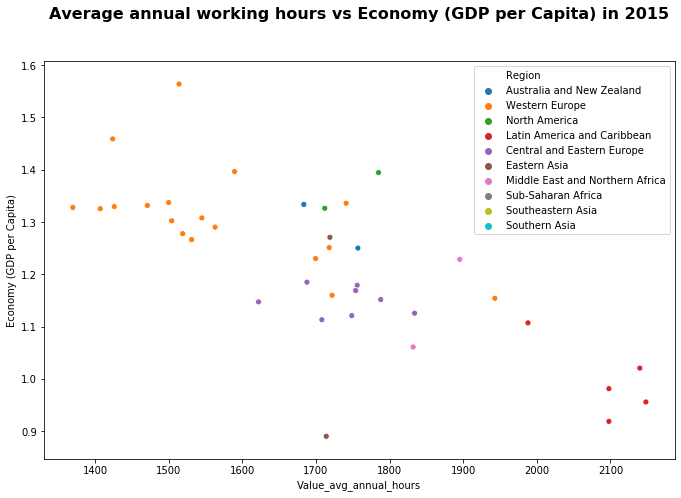

In [50]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Value_avg_annual_hours","Economy (GDP per Capita)",hue='Region', data=df[df['TIME'] == 2015])
ax.text(x=0.5, y=1.1, s='Average annual working hours vs Economy (GDP per Capita) in 2015', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 8)
#plt.xlim(0, 1.8)

fig.tight_layout()
plt.show()

- Lower average annual working hours, higher GDP! make since, developed country
- The countries in `Latin America and Caribbeam` region have much longer working hours, and GPA quite low. But they have high happiness score!! strangth

### Q5: What possible reasons that cause countries in `Latin America and Caribbeam` region has high happincess score
Low GDP, heavy air pollution, and quite long annual working hours

## Correlation matrix
Seems not useful information can get

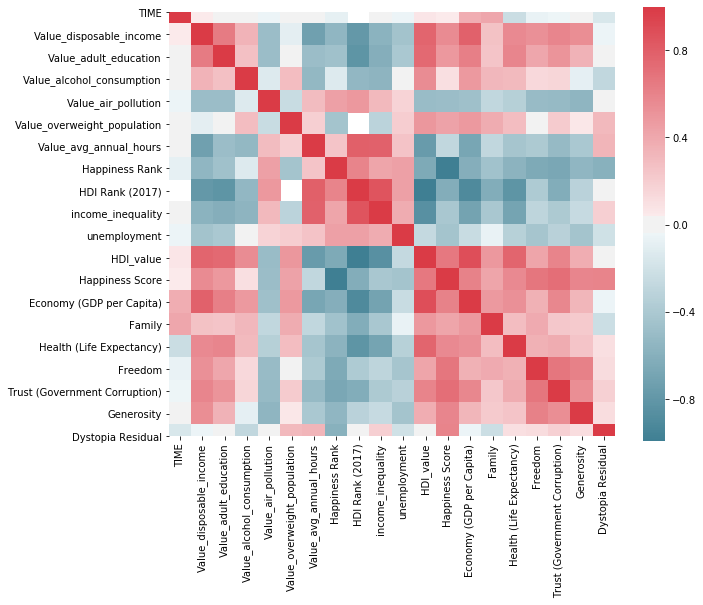

In [54]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)